In [5]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6

## Table Review: Welcome Survey

In [6]:
welcome = Table.read_table('welcome_survey_sp22.csv')
welcome.show(5)

Year,Extroversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second,5,5,8,Left-handed,Left leg in first,On your left side,Ants,0
Fourth,2,3,7,Right-handed,Left leg in first,On your left side,"Beetles, Centipedes, Scorpions",0
First,3,4,8,Right-handed,Right leg in first,On your back,Bird,0
Second,4,8,8,Right-handed,Right leg in first,On your back,Bird,0
Second,4,2,6,Right-handed,Right leg in first,On your right side,Bird,0


In [7]:
# On average, how long do side-sleepers sleep?
side_sleepers = welcome.where('Sleep position', are.containing('side'))
np.average(side_sleepers.column('Hours of sleep'))

7.1131167268351385

In [8]:
# How many students get at least 8 hours of sleep each night (on average)?
# First way:
welcome.where('Hours of sleep', are.above_or_equal_to(8)).num_rows

473

In [9]:
# Second way
np.count_nonzero(welcome.column('Hours of sleep') >= 8)

473

In [10]:
# Third way
np.sum(welcome.column('Hours of sleep') >= 8)

473

In [11]:
# Create a table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'
two_col = welcome.select('Hours of sleep', 'Sleep position')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position
8,On your left side
7,On your left side
8,On your back


In [12]:
# Second way
two_col = welcome.drop(
    'Handedness', 'Extraversion',
    'Pant leg', 'Number of textees',
    'Pets', 'Piercings',
    'Year', 'Extroversion')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position
8,On your left side
7,On your left side
8,On your back


## Discussion Question: NBA Salaries

In [13]:
nba = Table.read_table('nba_salaries.csv')
nba.show(3)

rank,name,position,team,salary,season
1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
3,Alonzo Mourning,C,Miami Heat,15004000,2000


In [14]:
# Question (a)
guards = nba.where('position', 'PG')
guards.where('salary', are.above(15)).column('name')

array(['Gary Payton', 'Damon Stoudamire', 'Stephon Marbury', ...,
       'Brandon Goodwin', 'Reggie Jackson', 'Ky Bowman'],
      dtype='<U24')

In [15]:
# Question (b)
nba.drop('position')
nba.num_columns

6

## Census ##

In [16]:
full = Table.read_table('nc-est2019-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [17]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial.show(5)

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [18]:
us_pop = partial.relabeled(2, '2014').relabeled(3, '2019')
us_pop.show(5)

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [19]:
us_pop.where('AGE', are.above_or_equal_to(100)).sort('AGE')

SEX,AGE,2014,2019
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,999,318301008,328239523
1,999,156654424,161657324
2,999,161646584,166582199


## 2019 Sex Ratios ##

In [20]:
us_pop_2019 = us_pop.drop('2014')
us_pop_2019.show(3)

SEX,AGE,2019
0,0,3783052
0,1,3829599
0,2,3922044


In [21]:
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2019
0,999,328239523
1,999,161657324
2,999,166582199


In [22]:
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [23]:
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females.show(3)

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500


In [24]:
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males.show(3)

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544


In [25]:
f_to_m_ratios = females.column(2) / males.column(2)

ratios = Table().with_columns(
    'Age', females.column('AGE'),
    'F:M Ratio', f_to_m_ratios
)

ratios

Age,F:M Ratio
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338
6,0.956801
7,0.956633
8,0.955161
9,0.959278


In [26]:
ratios.sort('Age', descending=True)

Age,F:M Ratio
100,3.27411
99,2.91367
98,2.65926
97,2.5868
96,2.41969
95,2.34042
94,2.2271
93,2.10192
92,1.99252
91,1.90275


## Line Plot

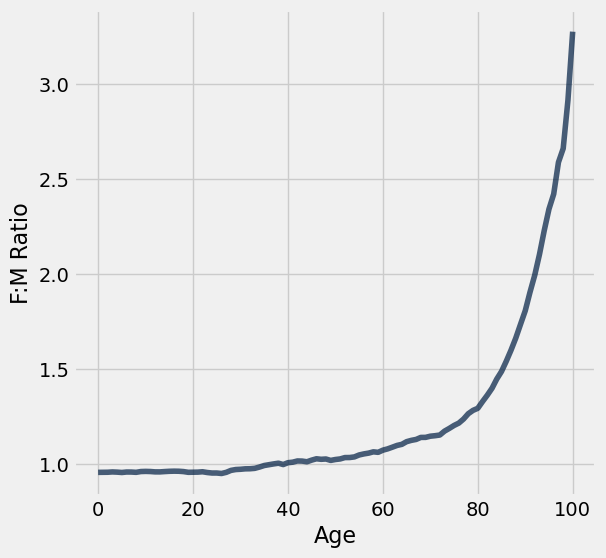

In [27]:
ratios.plot('Age', 'F:M Ratio')